In [2]:
import sys, os
sys.path.append(os.path.abspath('..'))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from src import config

sns.set_style('whitegrid')
%matplotlib inline

try:
    # Load raw data for comparison
    df_raw = pd.read_csv(config.TRAIN_CSV_PATH)
    print(f"Successfully loaded raw data from {config.TRAIN_CSV_PATH}")
    
    # Load processed data
    processed_path = f"{config.PROCESSED_DATA_DIR}/train_processed.json"
    df_processed = pd.read_json(processed_path, orient='records')
    print(f"Successfully loaded processed data from {processed_path}")
    
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure you have run the main data pipeline first.")

Successfully loaded raw data from e:\agentic-reasoning-engine\dataset\raw\train.csv
Successfully loaded processed data from e:\agentic-reasoning-engine\dataset\processed/train_processed.json


In [3]:
print("--- Row Count Comparison ---")
raw_rows = len(df_raw)
processed_rows = len(df_processed)
print(f"Raw data has {raw_rows} rows.")
print(f"Processed data has {processed_rows} rows.")

if raw_rows > processed_rows:
    print(f"\nNote: {raw_rows - processed_rows} rows were dropped, likely due to failing Pydantic validation. This is expected behavior.")
else:
    print("\nRow counts match, indicating all raw data passed validation.")

--- Row Count Comparison ---
Raw data has 384 rows.
Processed data has 384 rows.

Row counts match, indicating all raw data passed validation.


In [4]:
print("--- Schema (Column) Comparison ---")
raw_cols = set(df_raw.columns)
processed_cols = set(df_processed.columns)

if raw_cols == processed_cols:
    print("Schema is consistent between raw and processed data.")
else:
    print("Schema mismatch detected!")
    print(f"Columns in Raw but not in Processed: {raw_cols - processed_cols}")
    print(f"Columns in Processed but not in Raw: {processed_cols - raw_cols}")

--- Schema (Column) Comparison ---
Schema is consistent between raw and processed data.


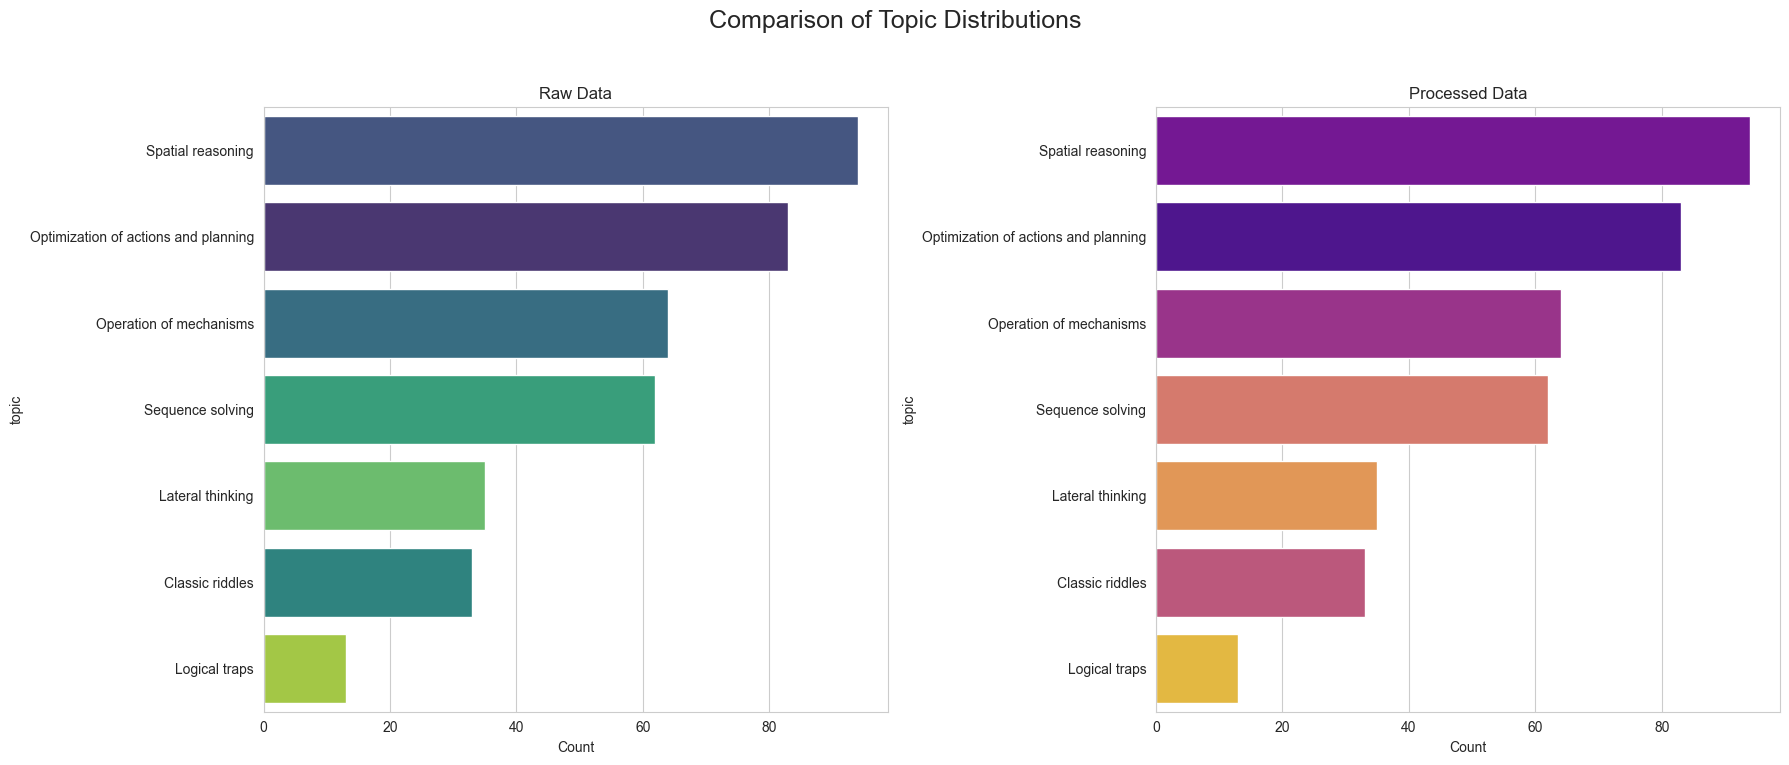

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True)
fig.suptitle('Comparison of Topic Distributions', fontsize=18)

# Raw Data Plot
sns.countplot(
    ax=axes[0],
    y='topic',
    hue='topic',  # added
    data=df_raw,
    order=df_raw['topic'].value_counts().index,
    palette='viridis',
    legend=False   # hides redundant legend
)
axes[0].set_title('Raw Data')
axes[0].set_xlabel('Count')

# Processed Data Plot
sns.countplot(
    ax=axes[1],
    y='topic',
    hue='topic',  # added
    data=df_processed,
    order=df_processed['topic'].value_counts().index,
    palette='plasma',
    legend=False
)
axes[1].set_title('Processed Data')
axes[1].set_xlabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


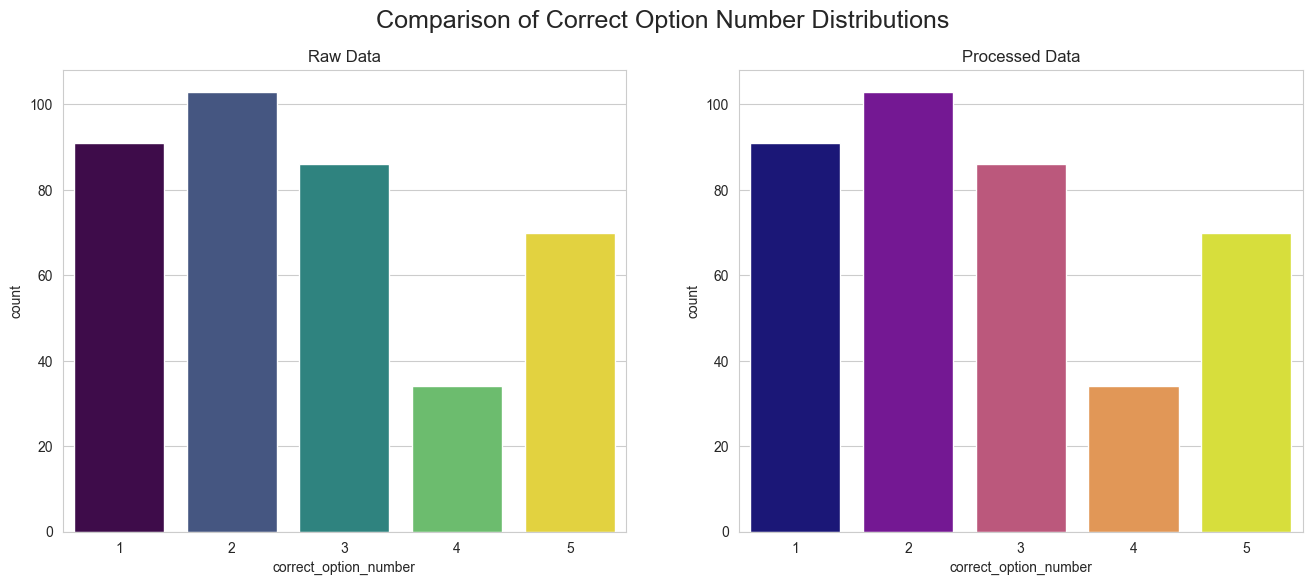

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparison of Correct Option Number Distributions', fontsize=18)

# Raw Data Plot
sns.countplot(
    ax=axes[0],
    x='correct_option_number',
    hue='correct_option_number',  # added to silence warning
    data=df_raw,
    palette='viridis',
    legend=False  # hide redundant legend
)
axes[0].set_title('Raw Data')

# Processed Data Plot
sns.countplot(
    ax=axes[1],
    x='correct_option_number',
    hue='correct_option_number',  # added
    data=df_processed,
    palette='plasma',
    legend=False
)
axes[1].set_title('Processed Data')

plt.show()


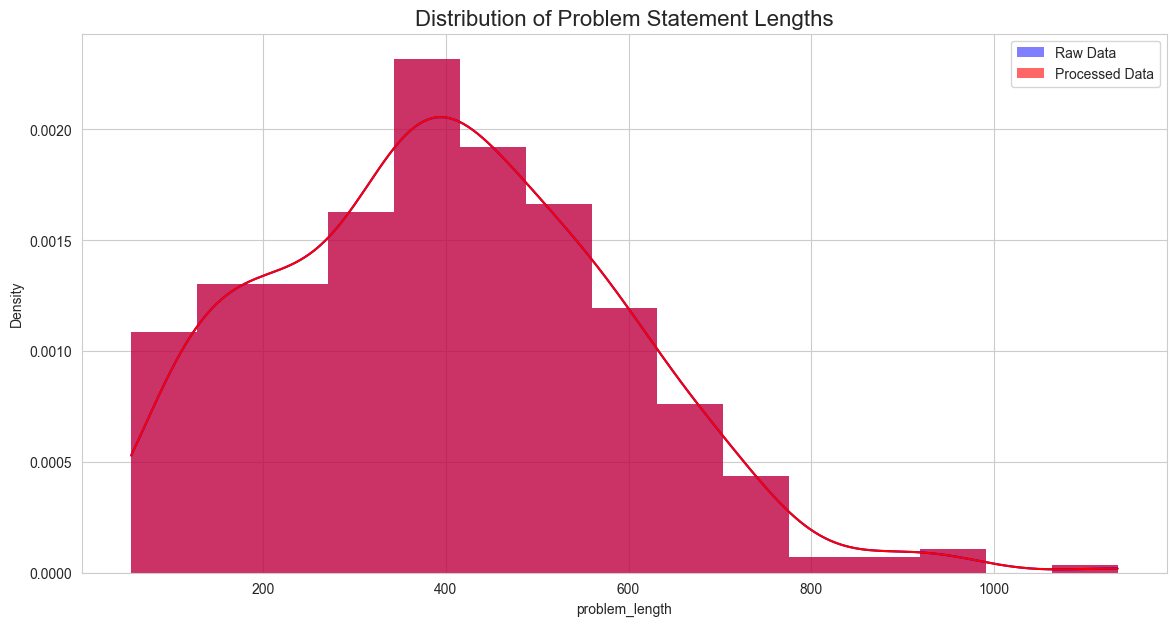

In [9]:
df_raw['problem_length'] = df_raw['problem_statement'].str.len()
df_processed['problem_length'] = df_processed['problem_statement'].str.len()

plt.figure(figsize=(14, 7))
sns.histplot(df_raw['problem_length'], color='blue', label='Raw Data', kde=True, stat='density', linewidth=0)
sns.histplot(df_processed['problem_length'], color='red', label='Processed Data', kde=True, stat='density', linewidth=0, alpha=0.6)
plt.title('Distribution of Problem Statement Lengths', fontsize=16)
plt.legend()
plt.show()
